In [29]:
import scipy.stats as ss

n = 10      # Number of total bets
p =   0.35  # Probability of getting "red" at the roulette
max_sbets = 10 # Maximum number of successful bets

hh = ss.binom(n, p)

total_p  = 0
for k in range(0, max_sbets+1):  # DO NOT FORGET THAT THE LAST INDEX IS NOT USED
    p = hh.pmf(k)
    print(k)
    print(p)
    total_p += p
    print(total_p)
    print("\n")

0
0.013462743344628913
0.013462743344628913


1
0.07249169493261728
0.08595443827724619


2
0.175652953105957
0.2616073913832032


3
0.2522196249726563
0.5138270163558596


4
0.2376684927626953
0.7514955091185549


5
0.15357041070820318
0.9050659198267581


6
0.0689097996767578
0.9739757195035159


7
0.02120301528515624
0.9951787347886721


8
0.004281378086425777
0.999460112875098


9
0.0005123016513671869
0.9999724145264651


10
2.7585473535156207e-05
1.0000000000000002




In [15]:
1 - total_p

0.7518553519614257

## 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def plot_distrib():
    p = 0.5
    i = 100000
    x = np.random.binomial(10, p, i)
    c = Counter(x).most_common()
    values = [c_[0] for c_ in c]
    probas = [c_[1] / i for c_ in c]
    plt.figure(figsize=(20, 10))
    plt.grid()
    plt.bar(values, probas)
    plt.title("Probabilité de chaque valeur de gain  \n $\mathbb{P}(X=x)$", fontsize=25)
    plt.xlabel("x", fontsize=20)
    plt.xticks([x + 0.01 for x in range(11)], list(range(11)), fontsize=20)
    plt.show()

    df = pd.DataFrame({"v":values, "p":probas}).sort_values("v")
    df["p"] = df["p"].cumsum()
    plt.figure(figsize=(20, 10))
    plt.grid()
    plt.plot(df.v, df.p)
    plt.title("Probabilité que $X$ soit plus petit que x\n $\mathbb{P}(X \leq x)$", fontsize=25)
    plt.xticks([x + 0.01 for x in range(11)], list(range(11)), fontsize=20)
    plt.show()

def plot_moment(p, value, f, title):
    N = 1001
    comp = []
    for i in range(1, N):
        comp.append(np.random.binomial(10, p, i))
    plt.figure(figsize=(20, 10))
    means = [f(sub_l) for sub_l in comp]
    plt.title(title, fontsize=25)
    plt.plot(range(1, N), means)
    plt.xlabel("Nombre de tirage", fontsize=20)
    plt.axhline(value)
    plt.show()
    plt.close()

# Soit $X \sim \mathscr{B}(n,p)$

## Une situation pouvant être modéliser par une variable aléatoire $X$ suivant une loi binomiale de paramètre $n=10$ et $p=\frac{1}{2}$ :
### - On lance une pièce $10$ fois, on gagne 1 à chaque face et 0 à chaque pile : $X$ =  le gain après les $10$ lancers



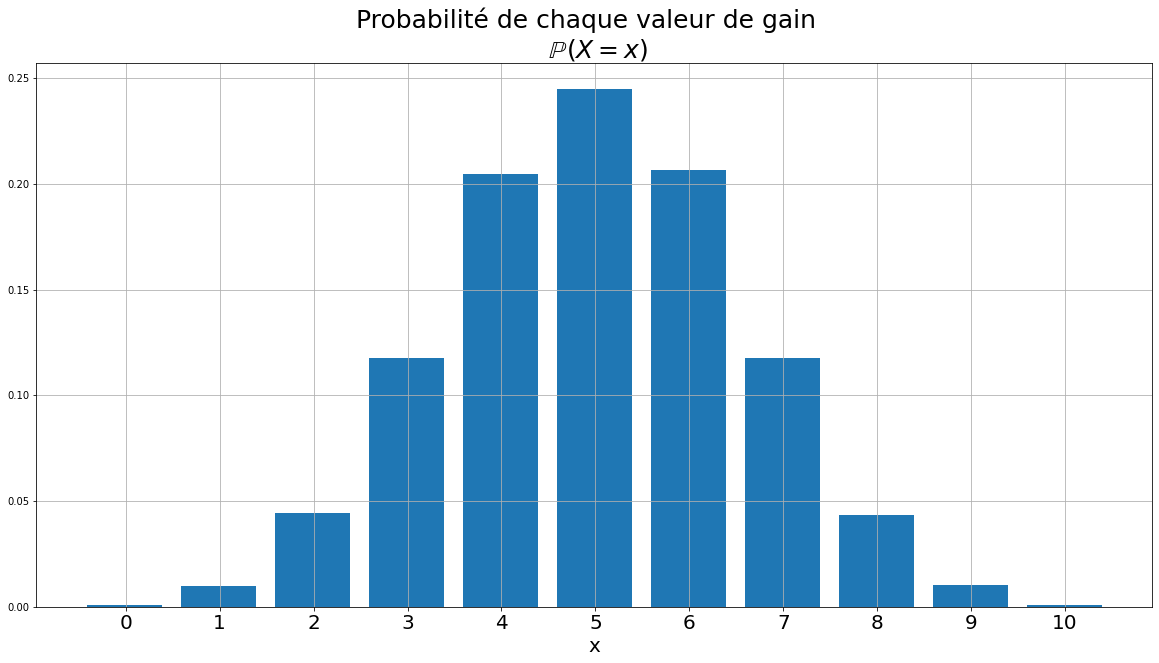

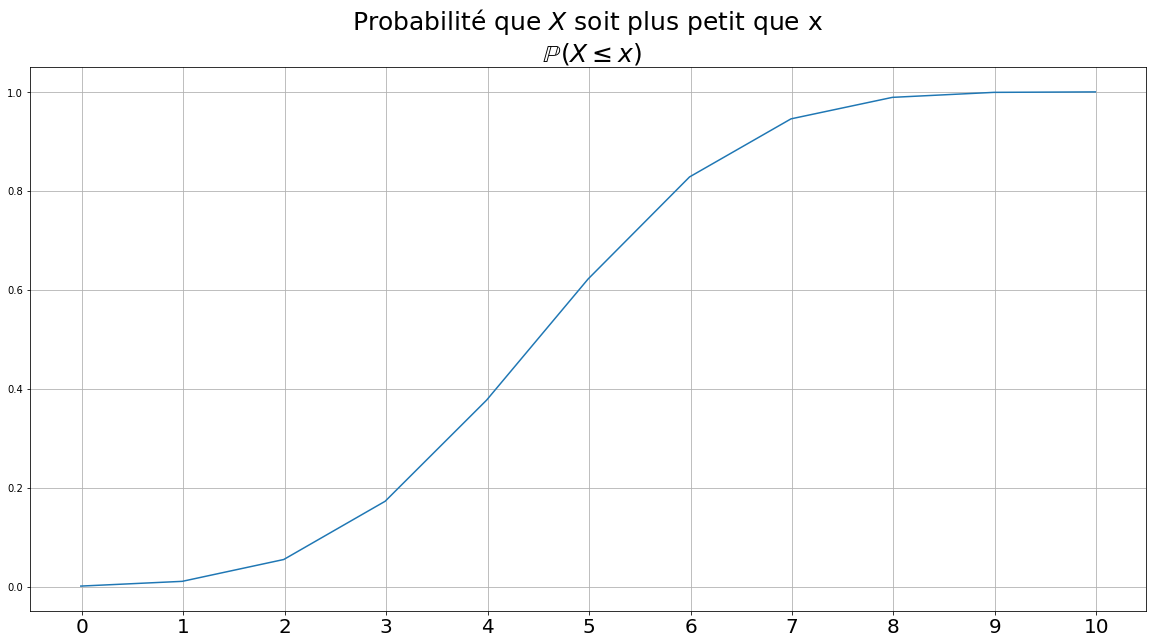

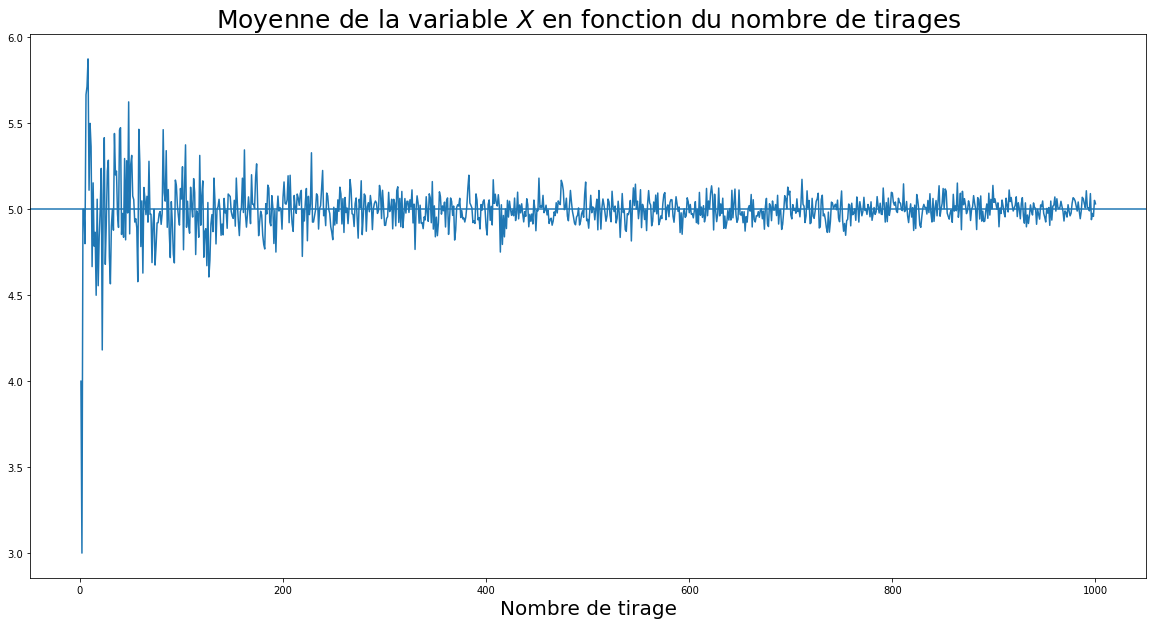

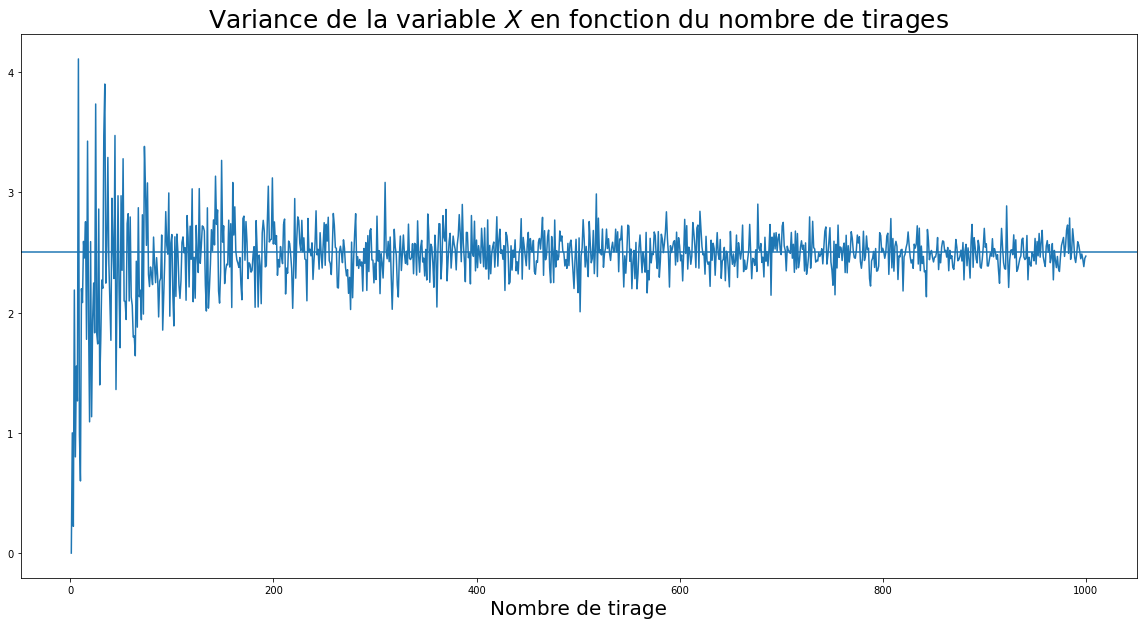

In [8]:
plot_distrib()
plot_moment(0.5, 5, np.mean, "Moyenne de la variable $X$ en fonction du nombre de tirages")
plot_moment(0.5, 0.5 * 0.5 * 10, np.var, "Variance de la variable $X$ en fonction du nombre de tirages")